<a href="https://colab.research.google.com/github/Ellen-Tuane/INPE_CAP417_Computational_Statistics/blob/main/CAP417_Hands_on_8_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 417 - PARTE C - HANDS-ON 01

Ellen Tuane


Bibliotecas e Comandos Necessários:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

Importação das Séries Temporais para este notebook:

In [ ]:
dfendo = pd.read_csv('endo.csv')
dfexo = pd.read_csv('exo.csv')

In [ ]:
dfendo.describe()

In [ ]:
dfexo.describe()

STEP01: Plotando a ST (com Opção de Média Zero)

exemplo: série endo

In [ ]:
dx=dfendo
dx2=dfexo

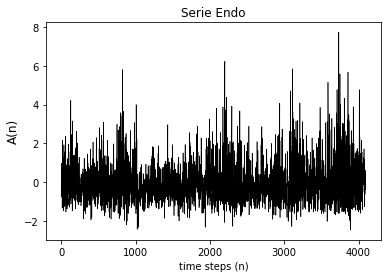

In [ ]:
# Endo ploting
dx=(dx - np.mean(dx))/np.std(dx)
plt.plot(dx, color="black", linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Serie Endo')
plt.show()

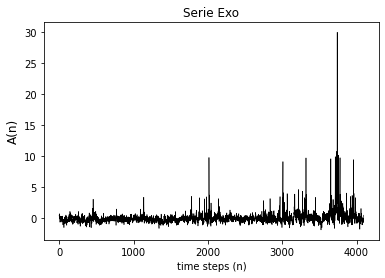

In [ ]:
# Exo ploting
dx2=(dx2 - np.mean(dx2))/np.std(dx2)
plt.plot(dx2, color="black", linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Serie Exo')
plt.show()

STEP 2: OBTER 3SIGMA E REMOVER VALORES ACIMA DE 3SIGMA  

(VOCÊ DEVE IMPLEMENTAR ESSE MÓDULO)

Veja exemplo na transparencia enviada ao final da aula 2. Nesse caso, teremos uma 2a ST a partir da 1a ST. A original e a outra sem as flutuações extremas.
Denomine essa 2a ST como dfendo2 ou dfexo2. Plote os histogramas para cada uma r calcule os momentos estatísticos K e S, seguindo os passos abaixo.  Note que teremos ao final 4 series temporais: dfendo e dfendo2, dexo e dexo2. 

In [ ]:
#IMPLEMENTAR A IDENTIFICACAO E A EXTRAÇÃO DOS VALORES > 3SIGMA, 
#GERANDO A SEGUNDA SERIE SEM AS FLUTUAÇÕES EXTREMAS.

In [ ]:
from numpy import mean
from numpy import std
#keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
dx3 = dx[np.abs(dx-dx.mean())<(3*dx.std())] 
dx3 = dx[~(np.abs(dx-dx.mean())>(3*dx.std()))] 

dx4 = dx2[np.abs(dx2-dx2.mean())<(3*dx2.std())] 
dx4 = dx2[~(np.abs(dx2-dx2.mean())>(3*dx2.std()))] 

STEP 3: HISTOGRAMA COM AJUSTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Original Serie Endo Distribution')

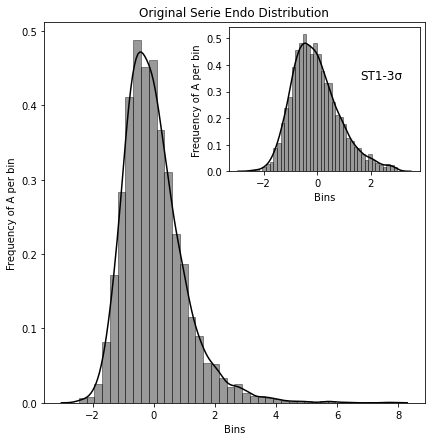

In [ ]:
# seaborn histogram with Kernel Density Estimation
from mpl_toolkits.axes_grid.inset_locator import inset_axes
fig= plt.figure(figsize=(15, 7),facecolor='white')

ax = fig.add_subplot(121)
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'}, color='k')
plt.ylabel('Frequency of A per bin')
plt.xlabel('Bins')
inset_axes1 = inset_axes(ax, 
                    width="50%", # width = 30% of parent_bbox
                    height=2.0, # height : 1 inch
                    loc=1)
sns.distplot(dx3, bins=40, hist_kws={'edgecolor':'black'}, color='k')
plt.ylabel('Frequency of A per bin')
plt.xlabel('Bins')
plt.title('ST1-3σ',position=(0.8, 0.6))
ax.set_title('Original Serie Endo Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


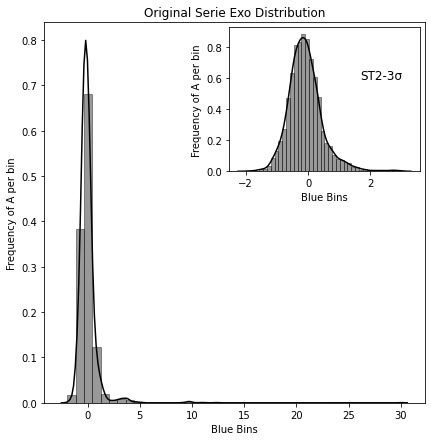

In [ ]:
fig= plt.figure(figsize=(15, 7),facecolor='white')
ax = fig.add_subplot(122)
ax.set_title('Original Serie Exo Distribution')
# the main axes is subplot(111) by default
sns.distplot(dx2, bins=40, hist_kws={'edgecolor':'black'}, color='k')
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
inset_axes1 = inset_axes(ax, 
                    width="50%", # width = 30% of parent_bbox
                    height=2.0, # height : 1 inch
                    loc=1)

sns.distplot(dx4, bins=40, hist_kws={'edgecolor':'black'}, color='k')
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('ST2-3σ',position=(0.8, 0.6))
plt.show()


STEP 4: CÁLCULO DOS MOMENTOS ESTATÍSTICOS E PLOTAGEM DOS PARAMETROS DE CULLEN-FREY (K E Sˆ2)

In [ ]:
from scipy.stats import skew, kurtosis
A=dx
m=np.mean(A)
std=np.std(A)
s=skew(A)
k1=kurtosis(A)
k2=k1+3

print("mean =", m, end='\n')
print("std =", std, end='\n')
print("skewness =", s, end='\n')
print("Fisher Kurtosis =", k1, end='\n')
print("Pearson Kurtosis =", k2, end='\n\n')

#ss=s*s
#k=k2

statrib = (m, std, s, k2)
print("All set (Pearson Stat):")
for n in statrib:
    
    print(n, end=' , ')

print()

mean = 1.0206   -2.587809e-17
dtype: float64
std = 1.0206    1.0
dtype: float64
skewness = [1.32881725]
Fisher Kurtosis = [3.85028336]
Pearson Kurtosis = [6.85028336]

All set (Pearson Stat):
1.0206   -2.587809e-17
dtype: float64 , 1.0206    1.0
dtype: float64 , [1.32881725] , [6.85028336] , 


STEP 5: CONSTRUA E PLOTE O ESPAÇO DE PARÂMETROS (KURTOSIS X QUADRADO DO 
SKEWNESS) COM OS RESPECTIVOS VALORES PARA ENDO.CSV (2 ST) E EXO.CSV (2 ST) (USE CORES DIFRENTES)

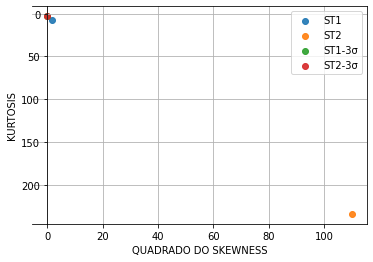

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
dx_list=[dx,dx2,dx3,dx4]
Name_list = ['ST1', 'ST2', 'ST1-3σ', 'ST2-3σ']
fig, ax = plt.subplots()
for i, j in zip(dx_list, Name_list):
    a =(skew(i))*(skew(i))
    k=kurtosis(i)
    if math.isnan(a) == True:
      a=0
    if math.isnan(k) == True:
      k=0
    ax.scatter(a, k+3, label=j,
                alpha=0.9)
ax.invert_yaxis()
plt.ylabel('KURTOSIS')
plt.xlabel('QUADRADO DO SKEWNESS')
ax.legend()
ax.grid(True)
ax.spines['left'].set_position('zero')
plt.show()